# Regression

### Boston housing price prediction

In [1]:
import numpy as np
import pandas as pd
import sklearn

In [2]:
print(np.__version__)
print(pd.__version__)
print(sklearn.__version__)
import sys
print(sys.version)

1.18.1
1.0.1
0.22.1
3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]


In [3]:
bh=pd.read_csv('BostonHousing.csv')
bh

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


# Exploatory Data Analysis(EDA)

In [4]:
bh.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
bh.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
print(sns.__version__)

0.10.0


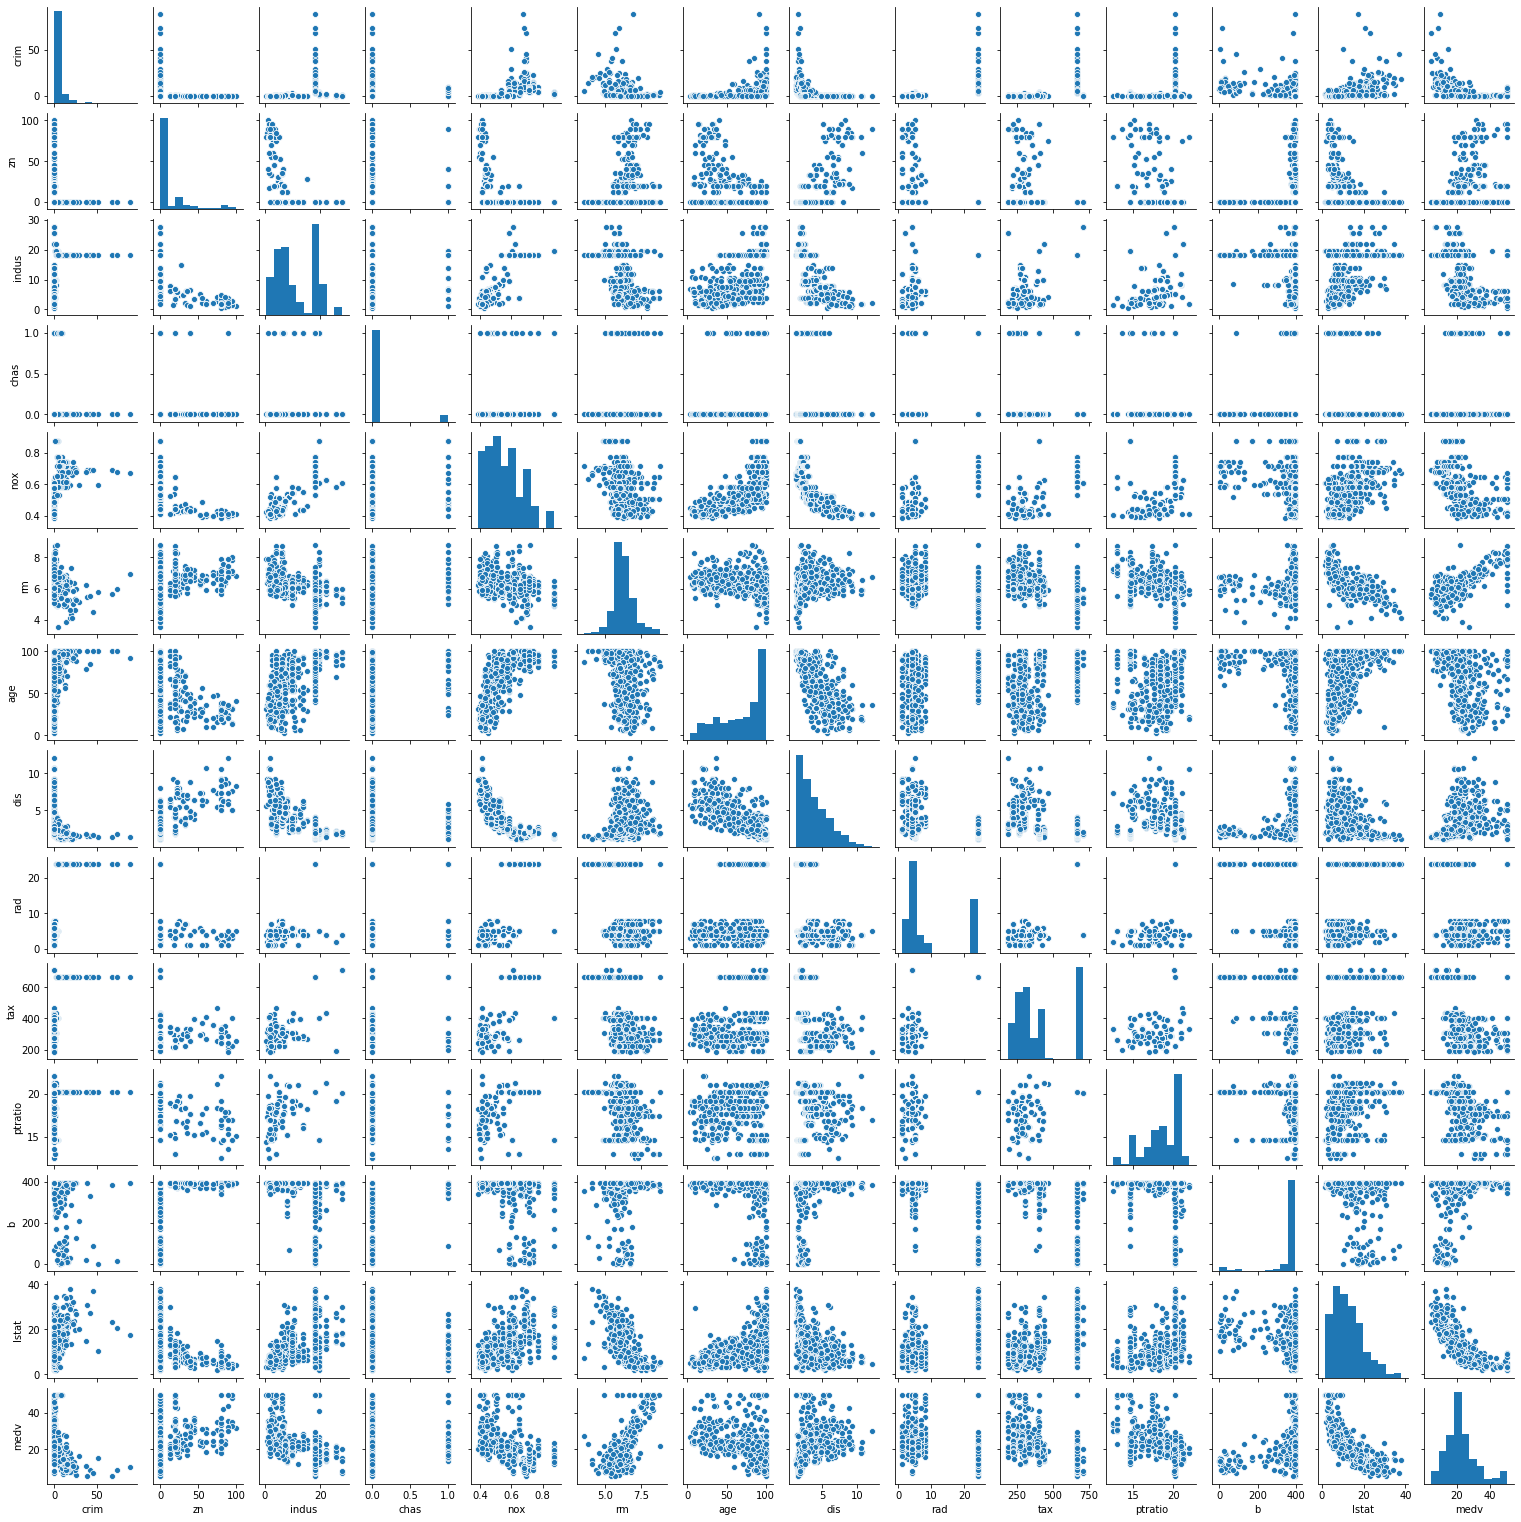

In [7]:
sns.pairplot(bh,height=1.5)
plt.show()

In [8]:
bh.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [9]:
col_study=['crim','zn','indus','nox','rm']

C:\Users\ABDULLAH\anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


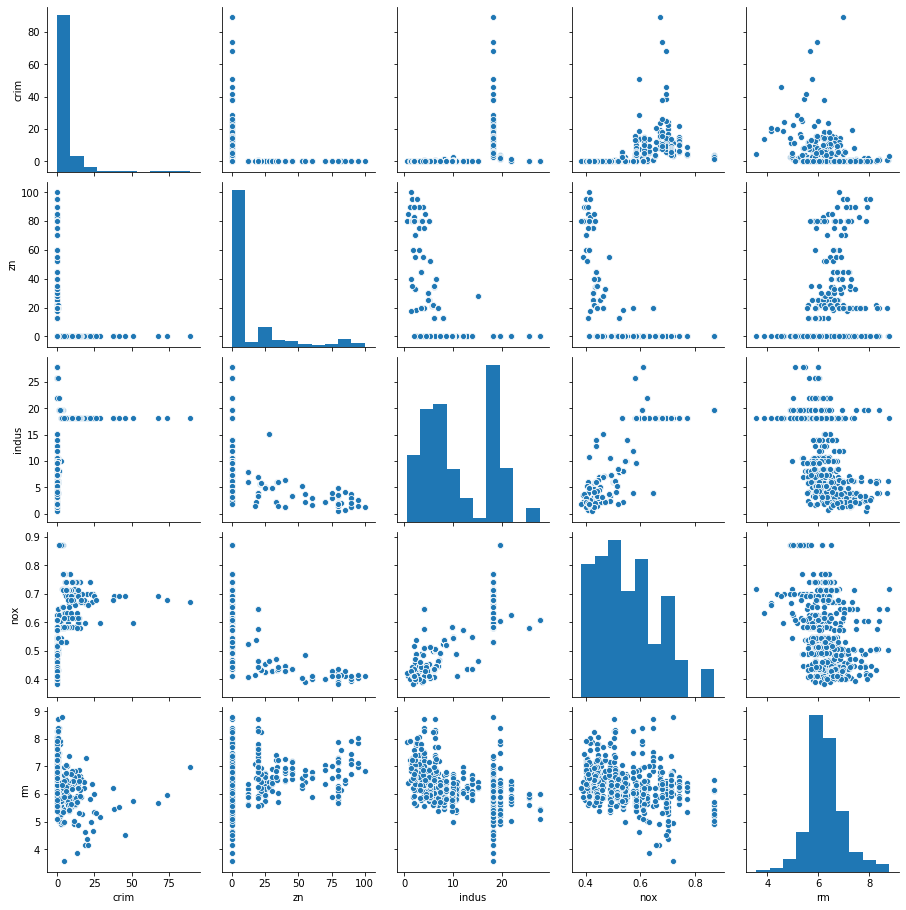

In [10]:
sns.pairplot(bh[col_study],size=2.5)
plt.show()

In [11]:
bh.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [12]:
col_study=['ptratio','b','lstat','medv']

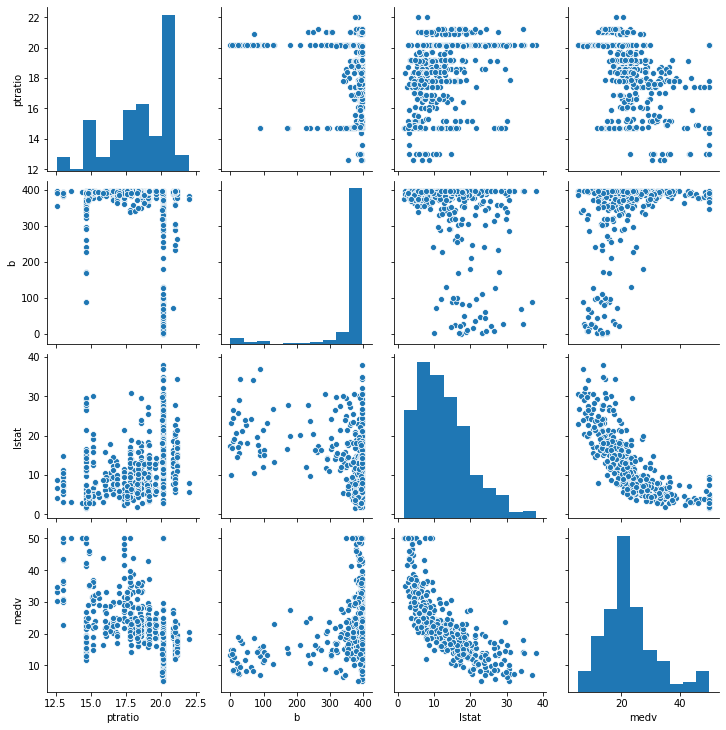

In [13]:
sns.pairplot(bh[col_study],height=2.5)
plt.show()

# Correlation analysis and features selection

In [14]:
bh.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


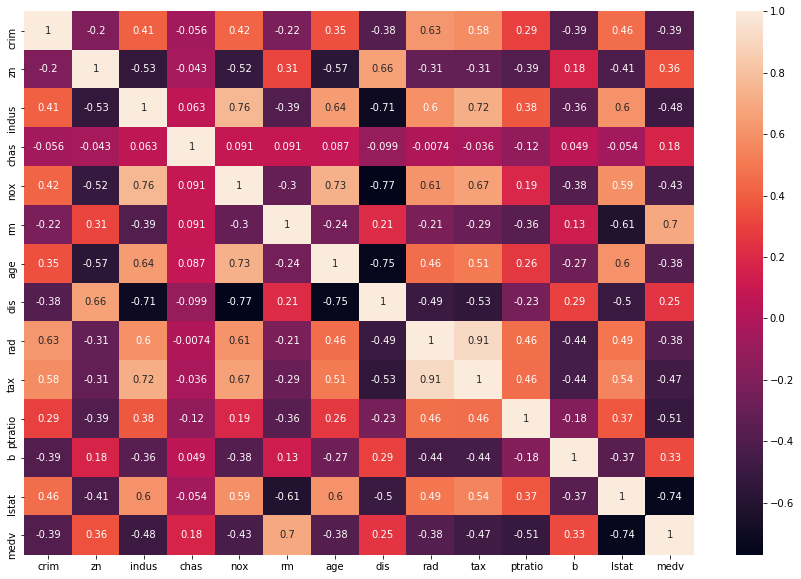

In [15]:
plt.figure(figsize=(15,10))
sns.heatmap(bh.corr(),annot=True)
plt.show()

In [16]:
col_study=['crim','zn','indus','chas']

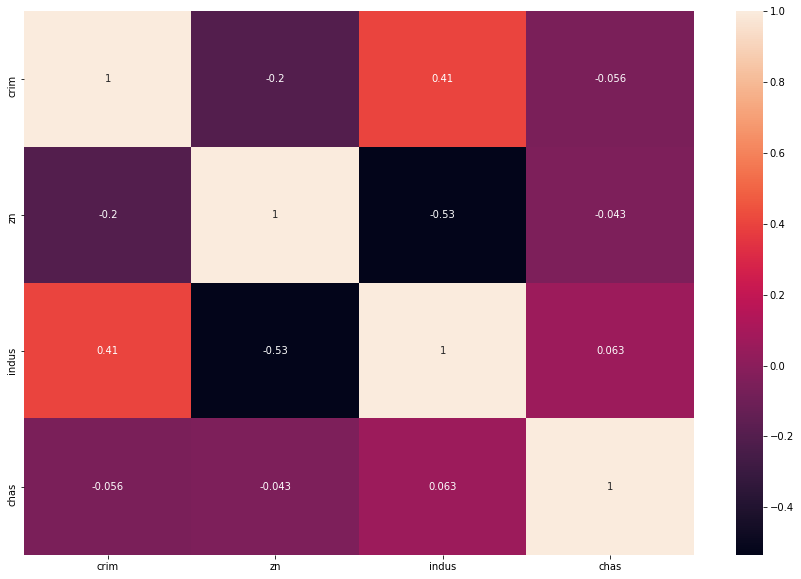

In [17]:
plt.figure(figsize=(15,10))
sns.heatmap(bh[col_study].corr(),annot=True)
plt.show()

# Linear Regression With scikit learn

In [18]:
bh.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [19]:
x=bh['rm'].values.reshape(-1,1)
x

array([[6.575],
       [6.421],
       [7.185],
       [6.998],
       [7.147],
       [6.43 ],
       [6.012],
       [6.172],
       [5.631],
       [6.004],
       [6.377],
       [6.009],
       [5.889],
       [5.949],
       [6.096],
       [5.834],
       [5.935],
       [5.99 ],
       [5.456],
       [5.727],
       [5.57 ],
       [5.965],
       [6.142],
       [5.813],
       [5.924],
       [5.599],
       [5.813],
       [6.047],
       [6.495],
       [6.674],
       [5.713],
       [6.072],
       [5.95 ],
       [5.701],
       [6.096],
       [5.933],
       [5.841],
       [5.85 ],
       [5.966],
       [6.595],
       [7.024],
       [6.77 ],
       [6.169],
       [6.211],
       [6.069],
       [5.682],
       [5.786],
       [6.03 ],
       [5.399],
       [5.602],
       [5.963],
       [6.115],
       [6.511],
       [5.998],
       [5.888],
       [7.249],
       [6.383],
       [6.816],
       [6.145],
       [5.927],
       [5.741],
       [5.966],
       [

In [20]:
y=bh['medv'].values

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
model=LinearRegression()

In [23]:
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
model.coef_

array([9.10210898])

In [25]:
model.intercept_

-34.670620776438554

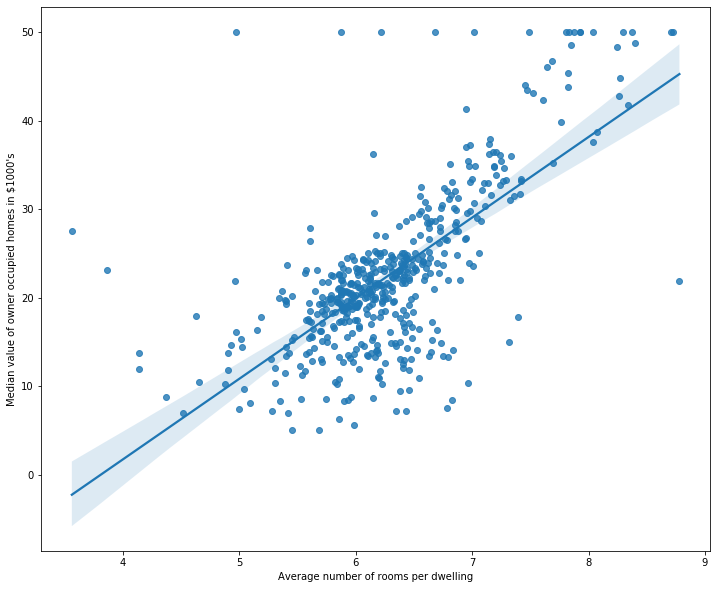

In [26]:
plt.figure(figsize=(12,10));
sns.regplot(x,y);
plt.xlabel('Average number of rooms per dwelling')
plt.ylabel("Median value of owner occupied homes in $1000's")
plt.show()

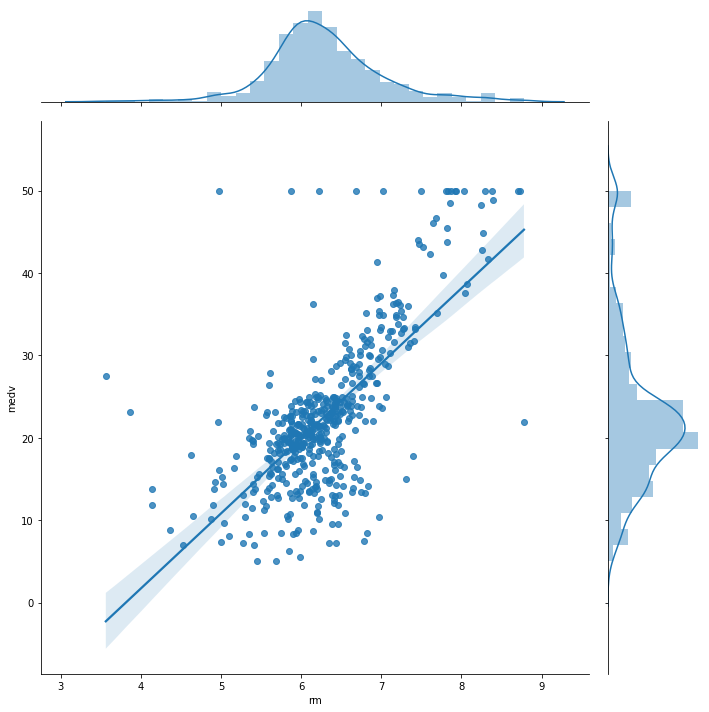

In [27]:
sns.jointplot(x='rm',y='medv',data=bh,kind='reg',height=10);
plt.show()

In [28]:
model.predict(np.array([7]).reshape(1,-1))

array([29.04414209])

In [29]:
model.predict(np.array([5]).reshape(1,-1))

array([10.83992413])

Most commonly ,the steps in using the scikit-learn estimator API are as follows:
    1. Choose a class of model by imporving the appropriate estimator class from scikit-learn.
    2. Choose model hyperparametes by instantiating this class with desired values.
    3. Arrange data into a features matrix and target vector.
    4. Fit the model to your data by calling the fit() method of the model instance.
    5. Apply the model to new data:
        * For supervised learning often we predict labels for unkown data using the predict() method.
        * For unsupervised learning,we often transform or infer properties of the data using the transform or predict() method.

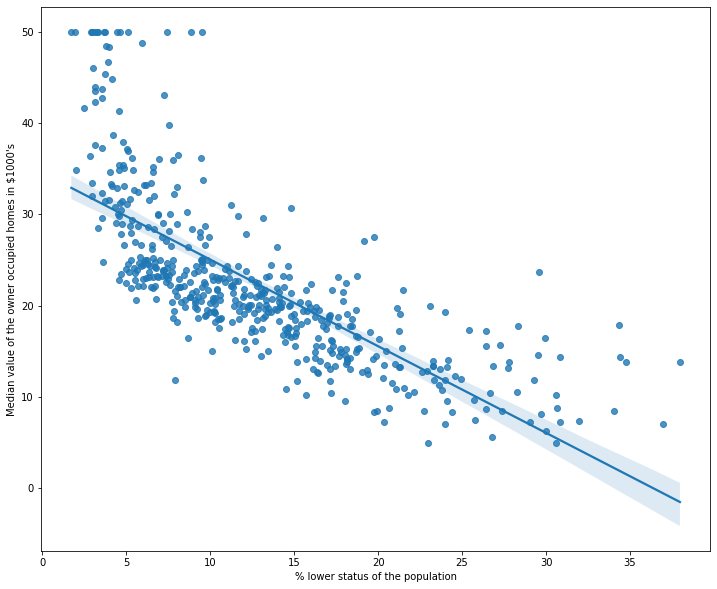

In [30]:
# step 1:Selecting a model

# step 2:
ml_2=LinearRegression()

# step 3: 
x=bh['lstat'].values.reshape(-1,1)
y=bh['medv'].values

#step 4:
ml_2.fit(x,y)

plt.figure(figsize=(12,10))
sns.regplot(x,y)
plt.xlabel('% lower status of the population')
plt.ylabel("Median value of the owner occupied homes in $1000's")
plt.show();

In [31]:
#step 5:
ml_2.predict(np.array([15]).reshape(1,-1))

array([20.30310057])

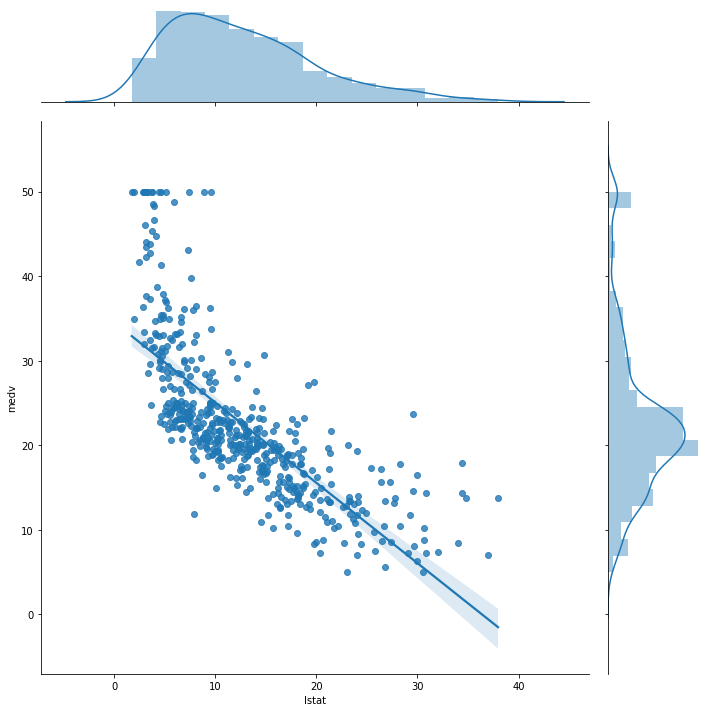

In [32]:
sns.jointplot(x='lstat',y='medv',data=bh,kind='reg',height=10);

# Robust Regression

In [33]:
bh.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## RANdom SAmple Consensus (RANSAC) Algorithm

Link:https://scikit-learn.org/stable/modules/linear_model.html#ransac-regression

Each iteration performs the following steps:
* Select min_samples random samples from the original data and check whether the set of data is valid (see is_data_valid).

* Fit a model to the random subset (base_estimator.fit) and check whether the estimated model is valid (see is_model_valid).

* Classify all data as inliers or outliers by calculating the residuals to the estimated model (base_estimator.predict(X) - y) - all data samples with absolute residuals smaller than the residual_threshold are considered as inliers.

* Save fitted model as best model if number of inlier samples is maximal. In case the current estimated model has the same number of inliers, it is only considered as the best model if it has better score.


In [34]:
x=bh['rm'].values.reshape(-1,1)
y=bh['medv'].values

In [35]:
from sklearn.linear_model import RANSACRegressor

In [36]:
ransac=RANSACRegressor()

In [37]:
ransac.fit(x,y)

RANSACRegressor(base_estimator=None, is_data_valid=None, is_model_valid=None,
                loss='absolute_loss', max_skips=inf, max_trials=100,
                min_samples=None, random_state=None, residual_threshold=None,
                stop_n_inliers=inf, stop_probability=0.99, stop_score=inf)

In [38]:
inlier_mask=ransac.inlier_mask_
outlier_mask=np.logical_not(inlier_mask)

In [39]:
inlier_mask

array([ True,  True, False, False, False, False,  True, False,  True,
        True, False,  True,  True,  True,  True,  True, False,  True,
       False,  True,  True,  True, False,  True,  True,  True,  True,
       False, False, False,  True, False, False,  True, False,  True,
        True,  True, False, False, False,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True, False,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [40]:
outlier_mask

array([False, False,  True,  True,  True,  True, False,  True, False,
       False,  True, False, False, False, False, False,  True, False,
        True, False, False, False,  True, False, False, False, False,
        True,  True,  True, False,  True,  True, False,  True, False,
       False, False,  True,  True,  True, False,  True, False, False,
       False, False, False, False, False, False, False, False,  True,
       False,  True, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [41]:
np.arange(3,10,1)

array([3, 4, 5, 6, 7, 8, 9])

In [43]:
line_x=np.arange(3,10,1)
line_y=ransac.predict(line_x.reshape(-1,1))
line_y

array([-8.55994318,  0.88213957, 10.32422231, 19.76630506, 29.2083878 ,
       38.65047055, 48.09255329])

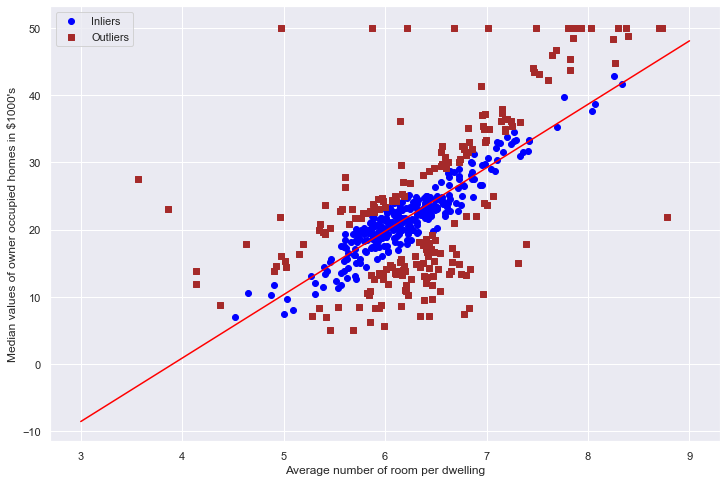

In [46]:
sns.set(style='darkgrid',context='notebook')
plt.figure(figsize=(12,8));
plt.scatter(x[inlier_mask],y[inlier_mask],c='blue',marker='o',label='Inliers')
plt.scatter(x[outlier_mask],y[outlier_mask],c='brown',marker='s',label='Outliers')
plt.plot(line_x,line_y,color='red')
plt.xlabel('Average number of room per dwelling')
plt.ylabel("Median values of owner occupied homes in $1000's")
plt.legend(loc='upper left')
plt.show()

In [51]:
ransac.estimator_.coef_


array([9.44208275])

In [52]:
ransac.estimator_.intercept_

-36.886191417768465

In [53]:
x=bh['lstat'].values.reshape(-1,1)
y=bh['medv'].values

In [54]:
ransac.fit(x,y)

RANSACRegressor(base_estimator=None, is_data_valid=None, is_model_valid=None,
                loss='absolute_loss', max_skips=inf, max_trials=100,
                min_samples=None, random_state=None, residual_threshold=None,
                stop_n_inliers=inf, stop_probability=0.99, stop_score=inf)

In [57]:
inlier_mask=ransac.inlier_mask_
outlier_mask=np.logical_not(inlier_mask)
line_x=np.arange(0,40,1)
line_y=ransac.predict(line_x.reshape(-1,1))
line_y

array([29.49087853, 28.71639213, 27.94190573, 27.16741934, 26.39293294,
       25.61844654, 24.84396014, 24.06947375, 23.29498735, 22.52050095,
       21.74601456, 20.97152816, 20.19704176, 19.42255536, 18.64806897,
       17.87358257, 17.09909617, 16.32460977, 15.55012338, 14.77563698,
       14.00115058, 13.22666418, 12.45217779, 11.67769139, 10.90320499,
       10.1287186 ,  9.3542322 ,  8.5797458 ,  7.8052594 ,  7.03077301,
        6.25628661,  5.48180021,  4.70731381,  3.93282742,  3.15834102,
        2.38385462,  1.60936822,  0.83488183,  0.06039543, -0.71409097])

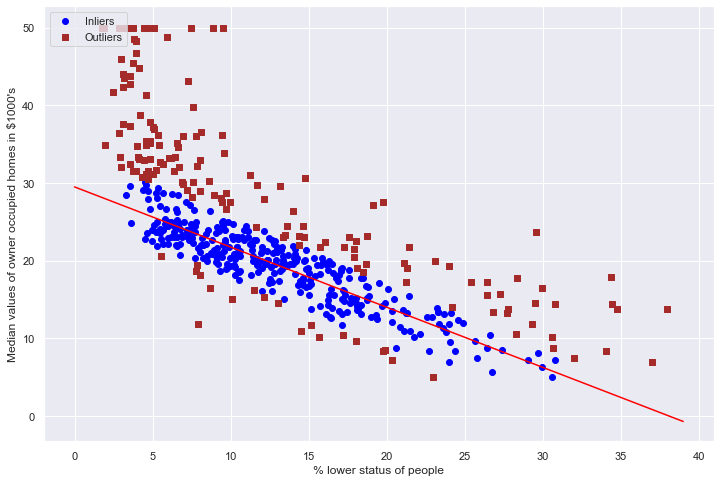

In [58]:
sns.set(style='darkgrid',context='notebook')
plt.figure(figsize=(12,8));
plt.scatter(x[inlier_mask],y[inlier_mask],c='blue',marker='o',label='Inliers')
plt.scatter(x[outlier_mask],y[outlier_mask],c='brown',marker='s',label='Outliers')
plt.plot(line_x,line_y,color='red')
plt.xlabel('% lower status of people')
plt.ylabel("Median values of owner occupied homes in $1000's")
plt.legend(loc='upper left')
plt.show()

# Performance evalution of Regression model.

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
x=bh.iloc[:,:-1].values

In [61]:
x

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [63]:
y=bh['medv'].values

In [64]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [65]:
lr=LinearRegression()

In [66]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [68]:
y_train_preds=lr.predict(x_train)
y_test_preds=lr.predict(x_test)

In [69]:
y_train_preds

array([32.55692655, 21.92709478, 27.54382573, 23.60318829,  6.57190962,
       14.94183849, 22.2234359 , 29.16492082, 33.24362083, 13.14592261,
       20.25607099, 20.69823381, 12.65147525, 23.36451045,  5.04647867,
       19.82921197,  9.41949932, 44.64390988, 30.78308135, 12.51377155,
       17.7083025 , 21.40137495, 23.63206936, 20.43451195, 35.01471208,
       13.84093827, 21.04977584, 35.15299117, 19.43031106, 13.17488144,
       14.10200042, 23.10677783, 14.38600111, 31.24428679, 25.30231549,
       15.41257398, 24.21291852,  9.40801187, 14.94526286, 20.83029825,
       32.74172958, 27.96372521, 25.60836003, 15.56419667, 31.11934684,
       27.96958264, 13.99703059,  7.63346533, 28.4388332 , 25.33766463,
        4.52504654, 28.38514306, 17.1896917 , 29.74225124, 20.45365104,
       15.92613078, 17.88247152, 12.73233004,  8.75151422, 19.2087374 ,
       34.49694507, 32.94684483, 23.67278817, 19.55243904, 22.8357545 ,
       26.87133257, 21.80817968, 17.06379885, 32.05027982, 10.92

In [70]:
y_test_preds

array([24.88963777, 23.72141085, 29.36499868, 12.12238621, 21.44382254,
       19.2834443 , 20.49647539, 21.36099298, 18.8967118 , 19.9280658 ,
        5.12703513, 16.3867396 , 17.07776485,  5.59375659, 39.99636726,
       32.49654668, 22.45798809, 36.85192327, 30.86401089, 23.15140009,
       24.77495789, 24.67187756, 20.59543752, 30.35369168, 22.41940736,
       10.23266565, 17.64816865, 18.27419652, 35.53362541, 20.96084724,
       18.30413012, 17.79262072, 19.96561663, 24.06127231, 29.10204874,
       19.27774123, 11.15536648, 24.57560579, 17.5862644 , 15.49454112,
       26.20577527, 20.86304693, 22.31460516, 15.60710156, 23.00363104,
       25.17247952, 20.11459464, 22.90256276, 10.0380507 , 24.28515123,
       20.94127711, 17.35258791, 24.52235405, 29.95143046, 13.42695877,
       21.72673066, 20.7897053 , 15.49668805, 13.98982601, 22.18377874,
       17.73047814, 21.58869165, 32.90522136, 31.11235671, 17.73252635,
       32.76358681, 18.7124637 , 19.78693475, 19.02958927, 22.89

# Method 1: Residual analysis

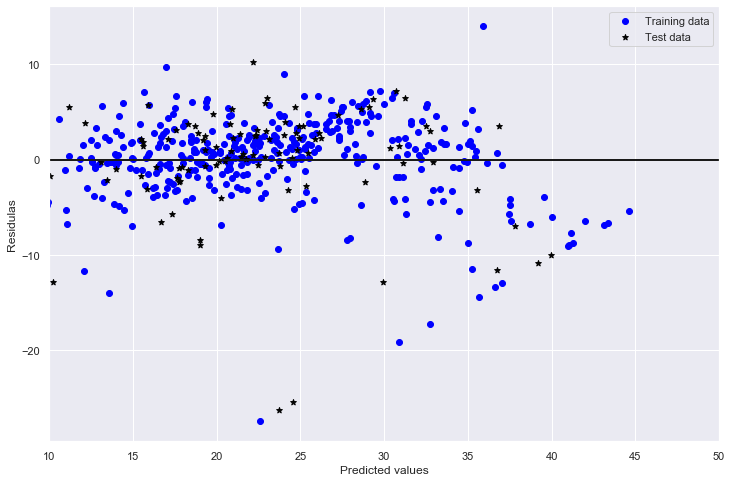

In [76]:
plt.figure(figsize=(12,8))
plt.scatter(y_train_preds,y_train_preds-y_train,c='blue',marker='o',label='Training data')
plt.scatter(y_test_preds,y_test_preds-y_test,c='black',marker='*',label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residulas')
plt.legend(loc='upper right')
plt.hlines(y=0,xmin=-10,xmax=50,lw=2,color='k')

plt.xlim([10,50])
plt.show()

# Method 2: Mean squared error(MSE)

* The average value of the sum of Squared Error cost function
* Useful for comparing different regression models
* For tunning parameters via a grid search and cross validation

In [77]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train,y_train_preds)

19.326470203585725

In [78]:
mean_squared_error(y_test,y_test_preds)

33.44897999767634

 # Method 3: Coefficient of Determination,R^2
 
 * R^2=1-SSE/SST
 * SSE: Sum of Squared Errors.
 * SST: Total Sum of Squares
 

In [79]:
from sklearn.metrics import r2_score

In [81]:
r2_score(y_train,y_train_preds)


0.7730135569264234

In [82]:
r2_score(y_test,y_test_preds)

0.5892223849182531